In [1]:
# !pip install sklearn_pandas

You should consider upgrading via the '/mnt/c/Users/diego/Desktop/machineLearnig_project1/.venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from preprocessing import *
from pathlib import Path
import pandas as pd

## Tunning the decision tree

In [3]:
file_dir = Path().resolve().parent
file_dir = os.path.join(file_dir, 'data')
file_dir = os.path.join(file_dir, 'heart_2020_cleaned.csv')
data = pd.read_csv(file_dir)
# num,cat = get_numerical_categorical_features(data)
# categorical_data = data.loc[:,cat]
# numerical_data = data.loc[:,num]
# scaler = 1
# num_data = treat_numerical_data(numerical_data,scaler)
# encoder = 0
# cate_data = treat_categorical_data(categorical_data.drop(columns=['HeartDisease']),encoder)
# treat_data = pd.concat([num_data,cate_data],axis=1)
# treat_data['HeartDisease'] = LabelEncoder().fit_transform(data['HeartDisease'])


In [4]:
# parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'], 'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']}
# clf = GridSearchCV(LogisticRegression(), parameters,cv=3,scoring='precision')
# target = treat_data.HeartDisease
# features = treat_data.drop(columns=['HeartDisease'])
# clf.fit(features, target)
# print(clf.best_params_)

In [5]:
from preprocessing import *

pipe = pipeline_preprocessing()

In [6]:

pre_processed_data = pipe.fit_transform(data)
# numerical = Feature_selector('categorical').transform(data)
# Categorical_tranformer().transform(numerical)

In [7]:
pre_processed_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.238165,-0.541632,-0.495146,2.419918
1,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.715795,-0.541632,-0.495146,-0.072349
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.324307,-0.541632,-0.495146,0.550717
3,0.0,0.0,1.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.477793,-0.541632,0.673522,-1.318483
4,0.0,0.0,0.0,0.0,0.0,1.0,9.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.180579,-0.541632,-0.495146,0.550717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,1.0,1.0,0.0,0.0,1.0,1.0,12.0,3.0,2.0,1.0,3.0,1.0,0.0,0.0,-0.224335,2.459663,-0.495146,0.550717
54742,1.0,0.0,0.0,0.0,0.0,1.0,11.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.338700,-0.241503,-0.495146,-0.072349
54743,1.0,1.0,0.0,1.0,0.0,0.0,12.0,5.0,2.0,0.0,2.0,0.0,0.0,1.0,-0.347973,-0.541632,-0.495146,-0.695416
54744,1.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,-0.607612,-0.141459,0.089188,0.550717


In [8]:
parameters = {'criterion':['gini','entropy'], 'splitter':['best', 'random'],'max_depth':range(1,8)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters,cv=5,scoring='accuracy',error_score='raise')
target = pre_processed_data.HeartDisease
features = pre_processed_data.drop(columns=['HeartDisease'])
clf.fit(features, target)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


In [42]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion= 'gini', splitter= 'best',max_depth= 4)

In [43]:
y = pre_processed_data.HeartDisease
X = pre_processed_data.drop(columns=['HeartDisease'])
features_names = X.columns
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_true=y_test,y_pred=y_pred,normalize='true')

fig = px.imshow(cm, text_auto=True)
fig.show()

[Text(0.5, 0.9, 'AgeCategory <= 6.5\ngini = 0.5\nsamples = 43796\nvalue = [21933, 21863]'),
 Text(0.25, 0.7, 'DiffWalking <= 0.5\ngini = 0.325\nsamples = 13302\nvalue = [10585, 2717]'),
 Text(0.125, 0.5, 'Stroke <= 0.5\ngini = 0.267\nsamples = 11844\nvalue = [9964, 1880]'),
 Text(0.0625, 0.3, 'AgeCategory <= 4.5\ngini = 0.247\nsamples = 11585\nvalue = [9914, 1671]'),
 Text(0.03125, 0.1, 'gini = 0.17\nsamples = 7600\nvalue = [6886, 714]'),
 Text(0.09375, 0.1, 'gini = 0.365\nsamples = 3985\nvalue = [3028, 957]'),
 Text(0.1875, 0.3, 'Diabetic <= 0.5\ngini = 0.312\nsamples = 259\nvalue = [50, 209]'),
 Text(0.15625, 0.1, 'gini = 0.362\nsamples = 181\nvalue = [43, 138]'),
 Text(0.21875, 0.1, 'gini = 0.163\nsamples = 78\nvalue = [7, 71]'),
 Text(0.375, 0.5, 'Stroke <= 0.5\ngini = 0.489\nsamples = 1458\nvalue = [621, 837]'),
 Text(0.3125, 0.3, 'Diabetic <= 0.5\ngini = 0.5\nsamples = 1216\nvalue = [591, 625]'),
 Text(0.28125, 0.1, 'gini = 0.489\nsamples = 786\nvalue = [451, 335]'),
 Text(0.3437

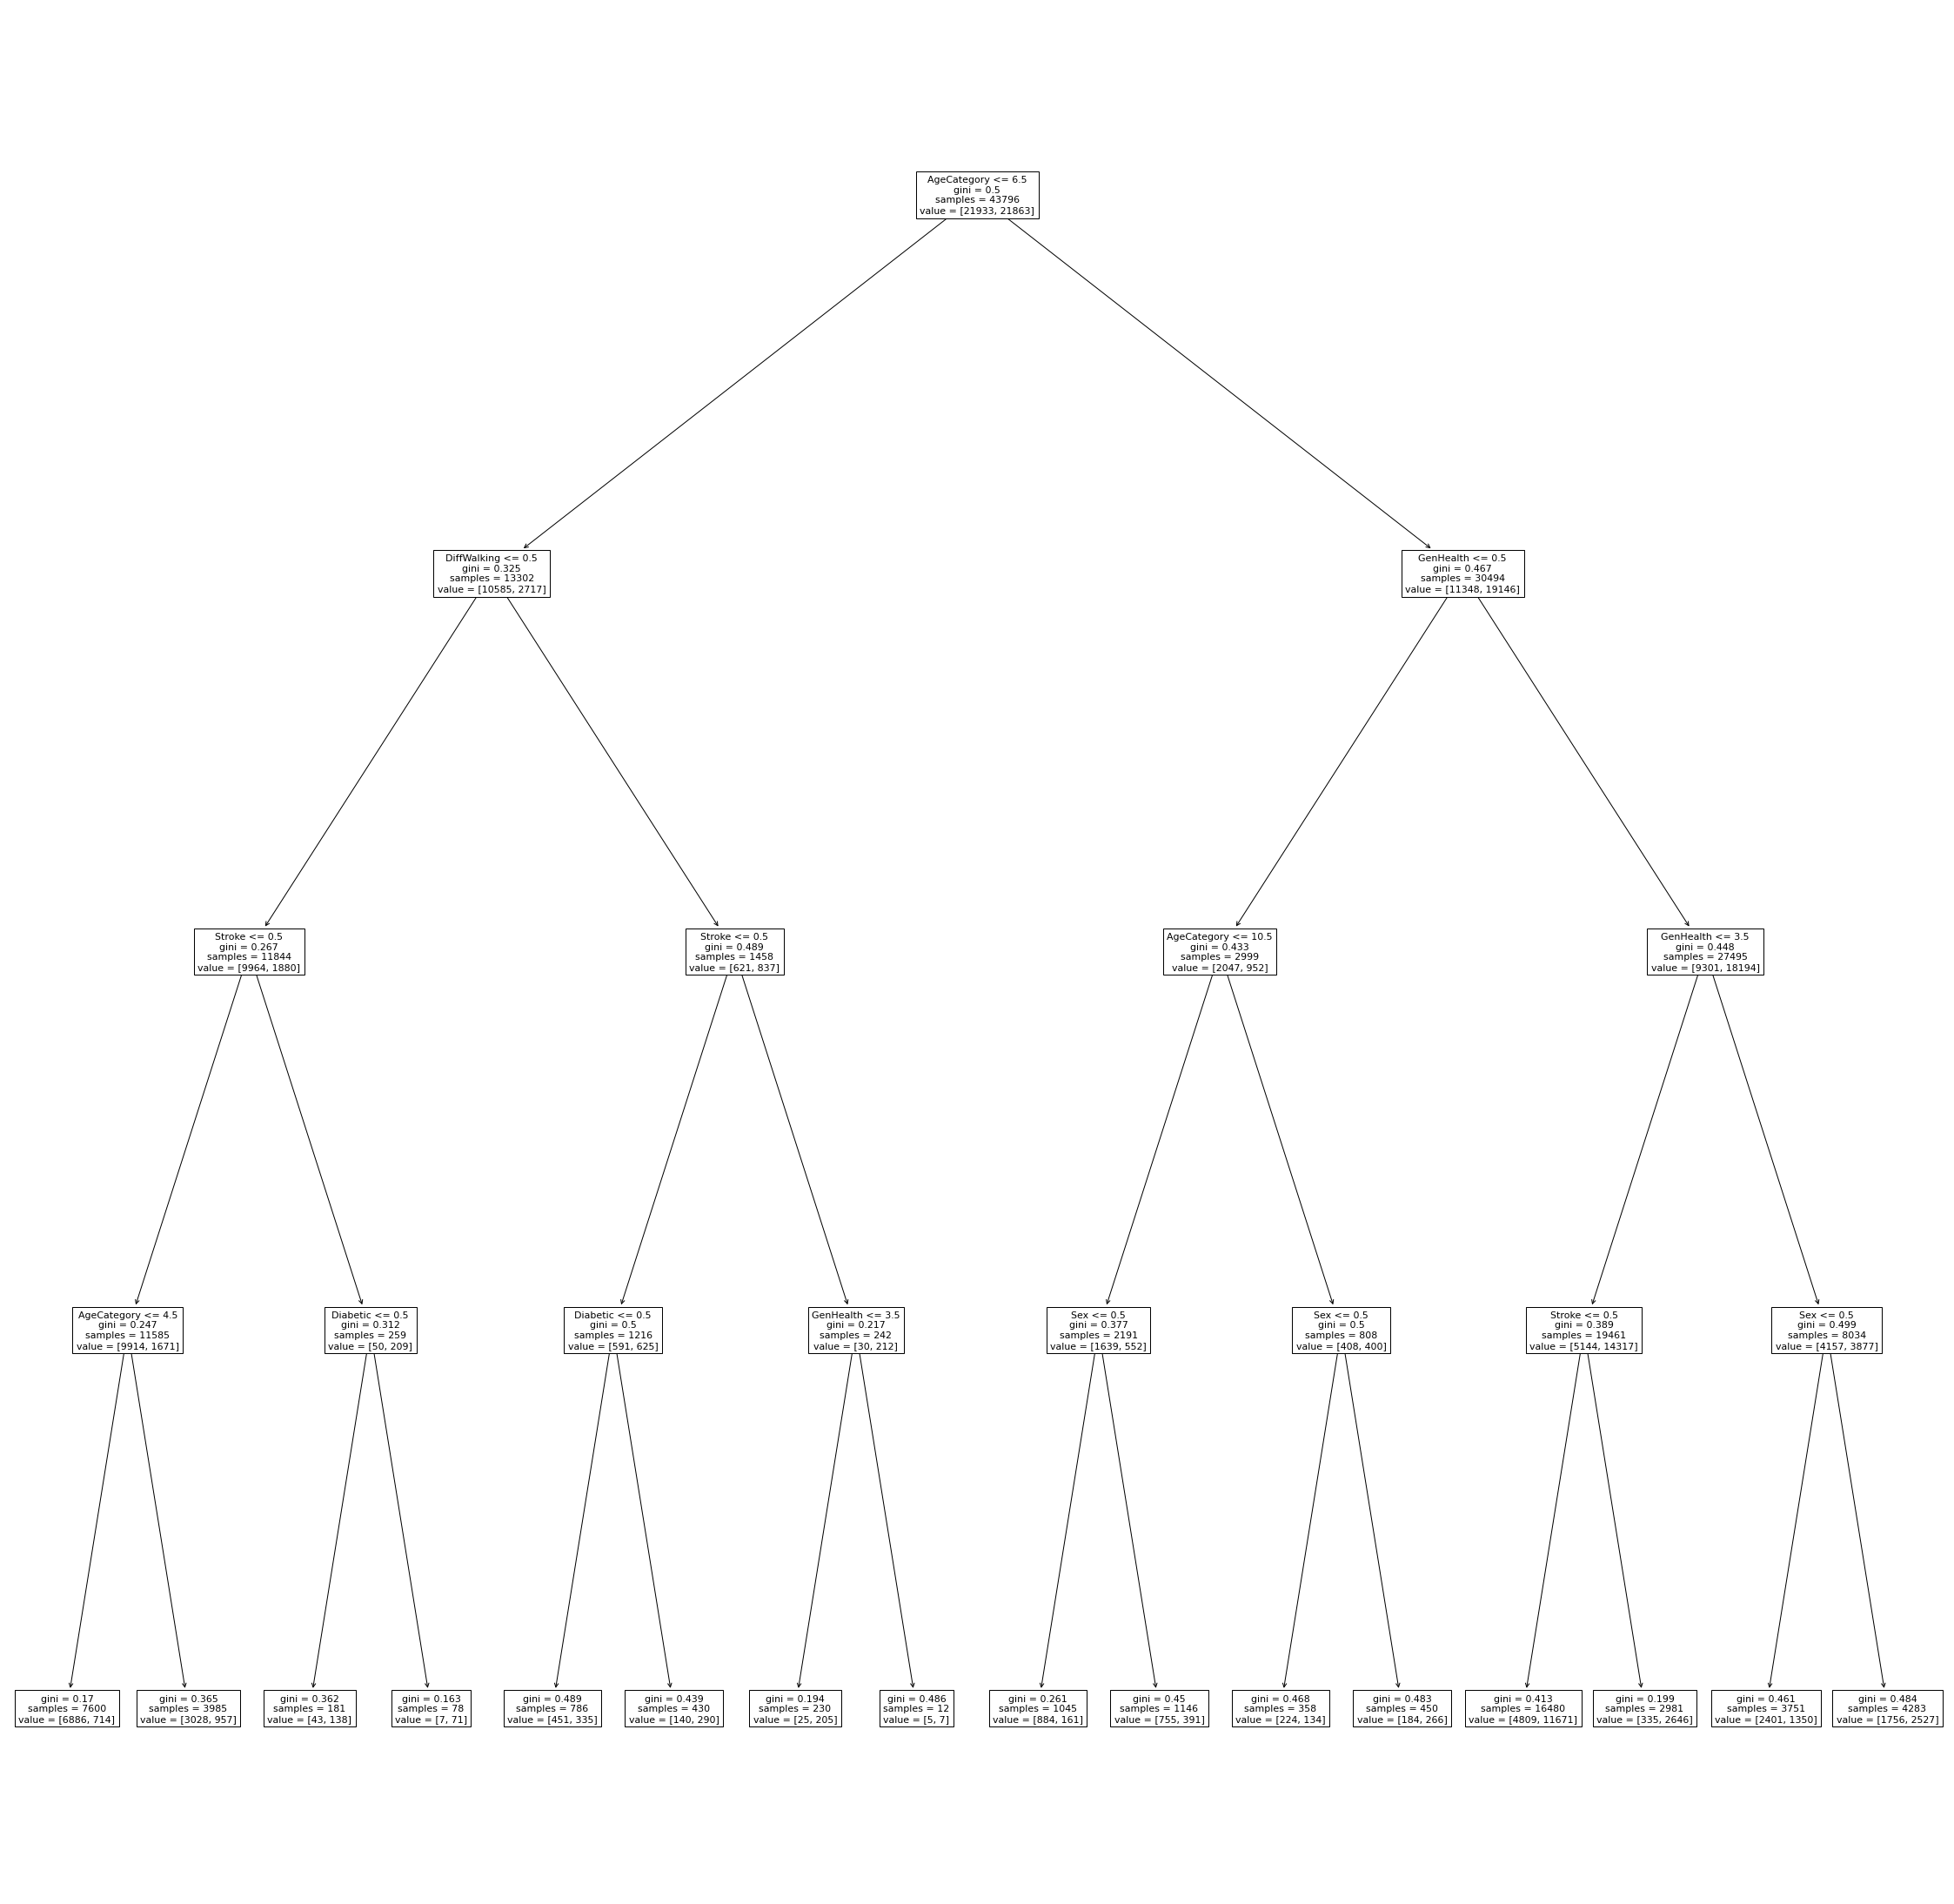

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(dt,feature_names=features_names)